Start by adding in the required modules.

In [1]:
import ECOSTRESS_Import
from ECOSTRESS_Import import MyClass

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Define our constants and functions.

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx + 1

Bands = np.full((13, 3), 0, dtype = np.float32)
Bands[0] = [0, 0.4304, 0.4574]
Bands[1] = [1, 0.4476, 0.5456]
Bands[2] = [2, 0.5375, 0.5825]
Bands[3] = [3, 0.6455, 0.6835]
Bands[4] = [4, 0.6944, 0.7134]
Bands[5] = [5, 0.7312, 0.7492]
Bands[6] = [6, 0.7626, 0.9076]
Bands[7] = [7, 0.7685, 0.7965]
Bands[8] = [8, 0.8483, 0.8813]
Bands[9] = [9, 0.932, 0.958]
Bands[10] = [10, 1.336, 1.411]
Bands[11] = [11, 1.5422, 1.6852]
Bands[12] = [12, 2.0814, 2.3234]

Perform the following steps:</br>
1. Load the Control Set
2. Define the boundaries and interpolation factor
3. Interpolate the data
4. Plot un-interpolated Control Set with one band filled 
5. Plot interpolated Control Set with same band filled</br></br>
The purpose of the two plots is to show how working with unmatched datasets will give inaccurate results when integrating to get the area under the curve.

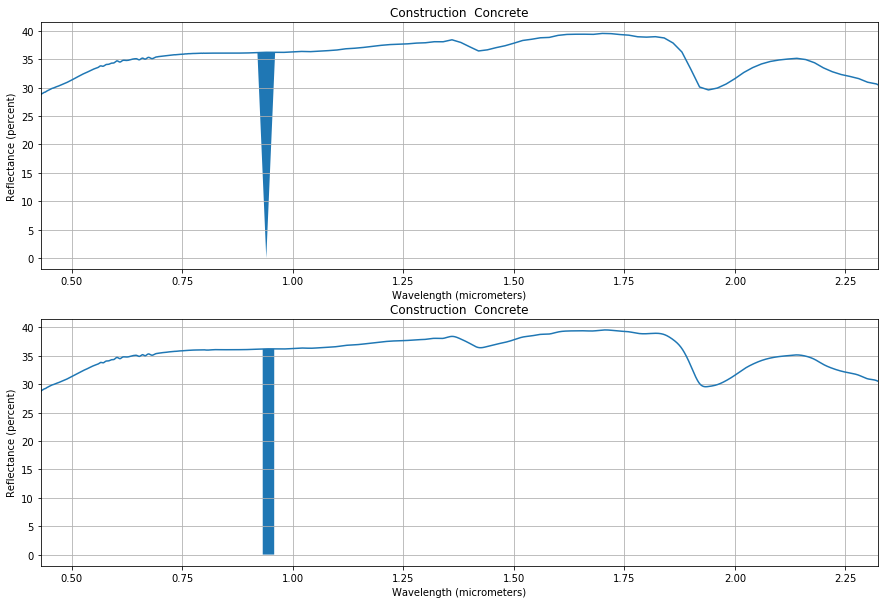

In [3]:
# 1. Load the Control Set
myobjectx = MyClass("controlSet\\manmade.concrete.pavingconcrete.solid.all.0092uuu_cnc.jhu.becknic.spectrum.txt")

x = myobjectx.arrayData[:, 0]
y = myobjectx.arrayData[:, 1]

# 2. Define the boundaries and interpolation factor
fMin = int(round(myobjectx.arrayData[0, 0] * 10000))
fMax = int(round(myobjectx.arrayData[(myobjectx.arrayData[:,0].size - 1), 0] * 10000))
interpolFactor = fMax - fMin

# 3. Interpolate the data
f = interp1d(x, y, kind='cubic')
xInter = np.linspace(myobjectx.arrayData[0, 0], myobjectx.arrayData[(myobjectx.arrayData[:,0].size - 1), 0], num=interpolFactor, endpoint=True)

# 4. Plot un-interpolated Control Set
plt.rcParams['figure.figsize'] = (15,10)
plt.subplot(2, 1, 1)
plt.grid()
plt.plot(x, y)
plt.title(myobjectx.Name)
plt.xlabel(myobjectx.X_Units)
plt.ylabel(myobjectx.Y_Units)
plt.xlim(Bands[0,1], Bands[12,2])

wh = (x>=Bands[9,1]) & (x<=Bands[9,2])
plt.fill_between(x, y, where=wh,  interpolate=True)

# 5. Plot interpolated Control Set
plt.subplot(2, 1, 2)
plt.grid()
plt.plot(xInter, f(xInter))
plt.title(myobjectx.Name)
plt.xlabel(myobjectx.X_Units)
plt.ylabel(myobjectx.Y_Units)
plt.xlim(Bands[0,1], Bands[12,2])

wh = (xInter>=Bands[9,1]) & (xInter<=Bands[9,2])
plt.fill_between(xInter, f(xInter), where=wh,  interpolate=True)

#fig.savefig(myobjectx.Name.replace(" ", "-") + "_" + myobjectx.Sample_No + ".png")

Here we integrate each Band using their bandwidths as limites.</br>
The integration is performed against the Control Set and uses the Bandwidths for the integration limites.</br>
The plot below shows the integral value for each of the bands.

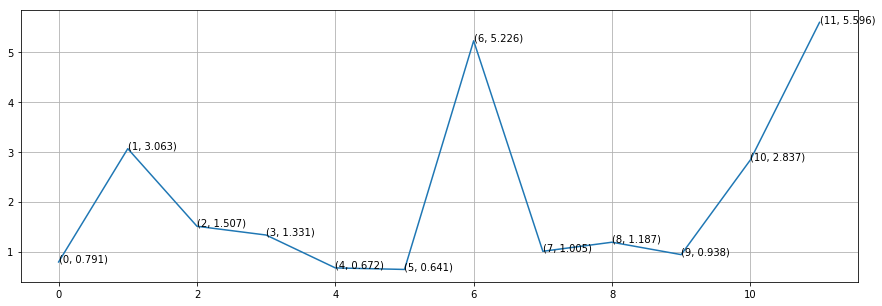

In [17]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (15,5)
ax = fig.add_subplot(111)

A = np.arange(12)
B = np.zeros(12)
for i in range(0, 12):
    B[i] = np.around(np.trapz(f(xInter)[find_nearest(xInter, Bands[i,1]):find_nearest(xInter, Bands[i,2])],xInter[find_nearest(xInter, Bands[i,1]):find_nearest(xInter, Bands[i,2])]), decimals = 3)

plt.plot(A,B)
for xy in zip(A, B):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    
plt.grid()
plt.show()